In [417]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import random

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import models

random.seed(10)
print(random.random()) 

0.5714025946899135


In [419]:
print(tf.__version__)
print(np.__version__)
print(sklearn.__version__)
print(pd.__version__)

2.6.0
1.21.2
0.22
1.3.3


In [2]:
df = pd.read_excel("default of credit card clients.xls", header=1).set_index("ID")
df = df.rename({"default payment next month": "default"}, axis=1)
df = df.rename({"LIMIT_BAL": "credit_score"}, axis=1)
df["credit_score"]/=10000

In [3]:
df

,credit_score,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,2.0,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,12.0,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,9.0,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,5.0,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5.0,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,22.0,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,15.0,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,3.0,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [4]:
df["credit_score"].describe()

count    30000.000000
mean        16.748432
std         12.974766
min          1.000000
25%          5.000000
50%         14.000000
75%         24.000000
max        100.000000
Name: credit_score, dtype: float64

In [5]:
print(df.columns), print(df.loc[:2])

Index(['credit_score', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')
    credit_score  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1            2.0    2          2         1   24      2      2     -1     -1   
2           12.0    2          2         2   26     -1      2      0      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  def

(None, None)

In [6]:
df["default"]

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   credit_score  30000 non-null  float64
 1   SEX           30000 non-null  int64  
 2   EDUCATION     30000 non-null  int64  
 3   MARRIAGE      30000 non-null  int64  
 4   AGE           30000 non-null  int64  
 5   PAY_0         30000 non-null  int64  
 6   PAY_2         30000 non-null  int64  
 7   PAY_3         30000 non-null  int64  
 8   PAY_4         30000 non-null  int64  
 9   PAY_5         30000 non-null  int64  
 10  PAY_6         30000 non-null  int64  
 11  BILL_AMT1     30000 non-null  int64  
 12  BILL_AMT2     30000 non-null  int64  
 13  BILL_AMT3     30000 non-null  int64  
 14  BILL_AMT4     30000 non-null  int64  
 15  BILL_AMT5     30000 non-null  int64  
 16  BILL_AMT6     30000 non-null  int64  
 17  PAY_AMT1      30000 non-null  int64  
 18  PAY_AMT2      30000 non-nu

In [8]:
df.isna().sum()

credit_score    0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
default         0
dtype: int64

In [9]:
df.describe()

,credit_score,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,16.748432,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,12.974766,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,14.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,24.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,100.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
"""
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

"""

'\nThis research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:\nX1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.\nX2: Gender (1 = male; 2 = female).\nX3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).\nX4: Marital status (1 = married; 2 = single; 3 = others).\nX5: Age (year).\nX6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine m

In [11]:
df["default"]

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


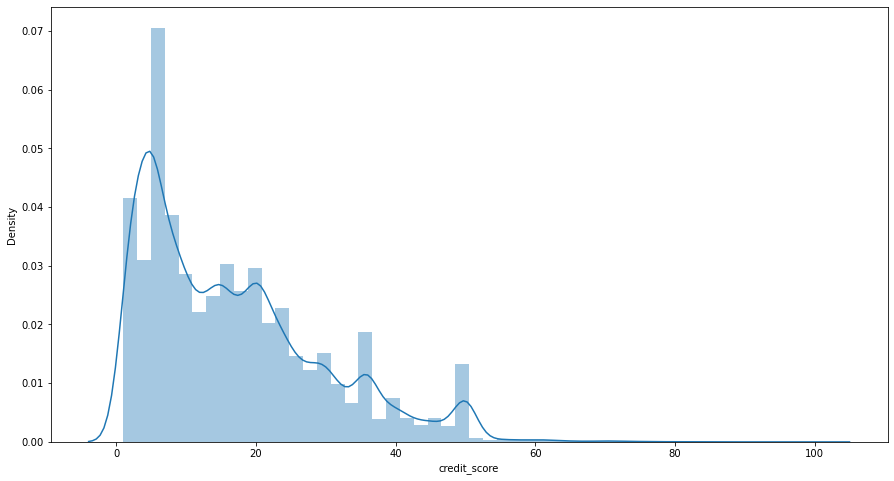

In [13]:
plt.figure(figsize=(15,8))
sns.distplot(df["credit_score"])
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


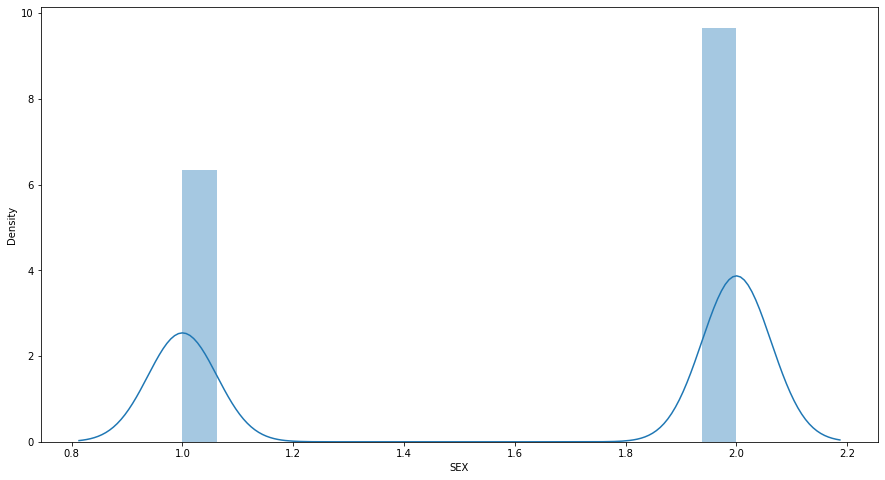

In [14]:
plt.figure(figsize=(15,8))
sns.distplot(df["SEX"])
plt.show()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


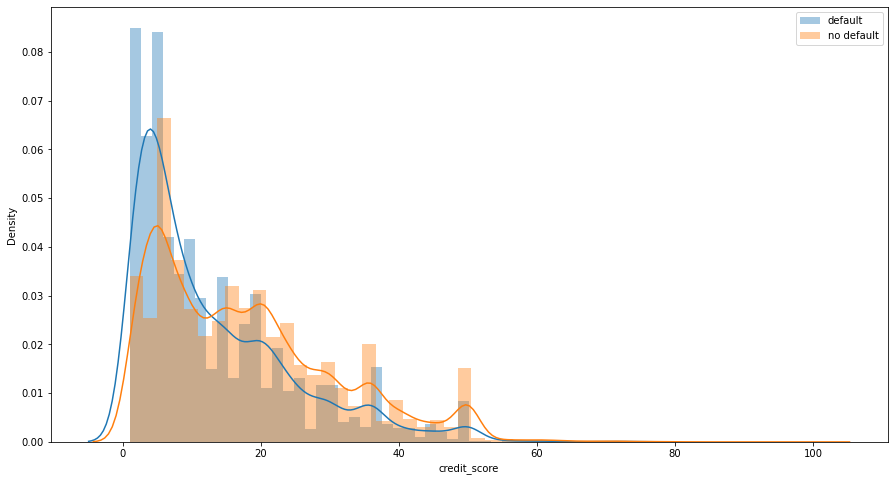

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(df[df["default"]==1]["credit_score"], label='default')
sns.distplot(df[df["default"]==0]["credit_score"], label='no default')
plt.legend()
plt.show()

In [18]:
df["SEX"].unique()

array([2, 1], dtype=int64)

In [19]:
# Education has only 4 categorical levels, removing columns with higher values
df = df[df["EDUCATION"]<=4]

In [312]:
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"] + pay_cols
continuous_columns = [c for c in df.columns if c not in categorical_columns + ["default"]]
target_col = "default"

In [315]:
# male=1, female=2 => male=1, female=0
df["feature_SEX"] = (df["SEX"] == 1)
df["feature_MARRIAGE"] = (df["MARRIAGE"] == 1)

# Education encoding
edu_encoder = OneHotEncoder()
df[["edu_0", "edu_1", "edu_2", "edu_3", "edu_4"]] = edu_encoder.fit_transform(df["EDUCATION"].values.reshape(-1, 1)).toarray()

# encoding the columns having categorical values for pyment due
enc = OneHotEncoder()
enc.fit(df[pay_cols[0]].values.reshape(-1, 1))

for col in pay_cols:
    df[[f"PAY_{col[-1]}_{ix}" for ix in range(-2, 9)]] = enc.transform(df[col].values.reshape(-1, 1)).toarray()

# Encoding marrige column

#marrige_encoder = OneHotEncoder()
#df[["marriage_0", "marriage_1", "marriage_2", "marriage_3"]] = marrige_encoder.fit_transform(df["MARRIAGE"].values.reshape(-1, 1)).toarray()

In [216]:
bill_cols = [c for c in df.columns if "BILL_AMT" in c][:-1]
pay_amt_cols = [c for c in df.columns if "PAY_AMT" in c][1:]

zero_payments = df[df[bill_cols].sum(1)==0]
df = df.drop(zero_payments.index, axis=0)

neg_bill = df[df[bill_cols].sum(1)<0]
df = df.drop(neg_bill.index, axis=0)

pay2bill = ((df[pay_amt_cols].sum(1).values)/(df[bill_cols].sum(1)))
df["pay_bill_rat"] = pay2bill

df = df[df["pay_bill_rat"]<=2]

In [382]:
feature_names = [f for f in df.columns if f not in categorical_columns+["default"]]

In [383]:
feature_names

['credit_score',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'feature_SEX',
 'feature_MARRIAGE',
 'pay_bill_rat',
 'edu_0',
 'edu_1',
 'edu_2',
 'edu_3',
 'edu_4',
 'PAY_0_-2',
 'PAY_0_-1',
 'PAY_0_0',
 'PAY_0_1',
 'PAY_0_2',
 'PAY_0_3',
 'PAY_0_4',
 'PAY_0_5',
 'PAY_0_6',
 'PAY_0_7',
 'PAY_0_8',
 'PAY_2_-2',
 'PAY_2_-1',
 'PAY_2_0',
 'PAY_2_1',
 'PAY_2_2',
 'PAY_2_3',
 'PAY_2_4',
 'PAY_2_5',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_-2',
 'PAY_3_-1',
 'PAY_3_0',
 'PAY_3_1',
 'PAY_3_2',
 'PAY_3_3',
 'PAY_3_4',
 'PAY_3_5',
 'PAY_3_6',
 'PAY_3_7',
 'PAY_3_8',
 'PAY_4_-2',
 'PAY_4_-1',
 'PAY_4_0',
 'PAY_4_1',
 'PAY_4_2',
 'PAY_4_3',
 'PAY_4_4',
 'PAY_4_5',
 'PAY_4_6',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_-2',
 'PAY_5_-1',
 'PAY_5_0',
 'PAY_5_1',
 'PAY_5_2',
 'PAY_5_3',
 'PAY_5_4',
 'PAY_5_5',
 'PAY_5_6',
 'PAY_5_7',
 'PAY_5_8',
 'PAY_6_-2',
 'PAY_6_-1',
 'PAY_6_0',
 

In [385]:
X = df.drop(["default"], axis=1).astype(float)
y = df["default"].astype(float)

In [386]:
(df["default"]==1).mean()

0.21962972356074056

In [387]:
continuous_cols = ['credit_score', 'AGE', 'pay_bill_rat']
descret_cols = ["EDUCATION", "feature_MARRIAGE"]

to_normalize = continuous_cols + descret_cols

## Experiment with Cross Validation

In [234]:
feature_names = ['credit_score', 'AGE', 'feature_SEX', 'EDUCATION', 'feature_MARRIAGE', 'pay_bill_rat']
feature_names = ['pay_bill_rat']

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


sc = MinMaxScaler()
X_train = sc.fit_transform(X_train[feature_names])
X_test = sc.transform(X_test[feature_names])

#X_train[to_normalize] = sc.fit_transform(X_train[to_normalize])
#X_test[to_normalize] = sc.transform(X_test[to_normalize])

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.mean())

(22080, 88) (5521, 88) (22080,) (5521,)
0.220018115942029


In [458]:
def get_model(hidden_size=16):
    model = models.Sequential()
    model.add(L.Dense(hidden_size, input_dim = (len(feature_names)), activation="relu"))
    model.add(L.Dense(1, activation="sigmoid"))

    opt = tf.keras.optimizers.Adam(learning_rate=0.003)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy", "AUC"])

    return model

In [459]:
model = get_model()
model.summary()

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 16)                1424      
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 17        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [460]:
hidden_layers = [16, 32, 64]
layers_mertrics = {}

for hidden_size in hidden_layers:

    folds = KFold(n_splits=5)
    #folds = LeaveOneOut()

    hist_arr = []
    models_arr = []
    validation_metrics =[]

    X_train, y_train = pd.DataFrame(X_train), pd.DataFrame(y_train)
    for train_idx, val_idx in folds.split(X_train, y_train):
        print(train_idx, val_idx)
        print(len(train_idx), len(val_idx))

        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]


        print(X_tr.shape)
        model = get_model(hidden_size=hidden_size)

        hist = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val, y_val), verbose=0)
        hist_arr.append(hist)
        models_arr.append(model)

        model_scores = model.evaluate(X_val, y_val)
        print(model_scores)
        validation_metrics.append(model_scores)

    layers_mertrics[hidden_size] = np.array(validation_metrics).mean(0)

[ 4416  4417  4418 ... 22077 22078 22079] [   0    1    2 ... 4413 4414 4415]
17664 4416
(17664, 88)
138/138 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8284 - auc: 0.7807
[0.4213829040527344, 0.8283514380455017, 0.780663251876831]
[    0     1     2 ... 22077 22078 22079] [4416 4417 4418 ... 8829 8830 8831]
17664 4416
(17664, 88)
138/138 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8245 - auc: 0.7680
[0.4251214265823364, 0.8245018124580383, 0.7680331468582153]
[    0     1     2 ... 22077 22078 22079] [ 8832  8833  8834 ... 13245 13246 13247]
17664 4416
(17664, 88)
138/138 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8211 - auc: 0.7713
[0.44287165999412537, 0.8211050629615784, 0.7713375091552734]
[    0     1     2 ... 22077 22078 22079] [13248 13249 13250 ... 17661 17662 17663]
17664 4416
(17664, 88)
138/138 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8200 - a

In [461]:
pd.DataFrame(layers_mertrics)

,16,32,64
0,0.431313,0.435656,0.440362
1,0.824185,0.822781,0.821830
2,0.775656,0.769780,0.767334


In [462]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [463]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)

C:\Users\surajp\AppData\Local\Temp/ipykernel_3252/2609720490.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [464]:
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
690/690 [==============================] - 1s 2ms/step - loss: 0.4064 - accuracy: 0.8365 - auc: 0.7999 - val_loss: 0.4391 - val_accuracy: 0.8214 - val_auc: 0.7691
Epoch 2/50
690/690 [==============================] - 1s 2ms/step - loss: 0.4035 - accuracy: 0.8379 - auc: 0.8032 - val_loss: 0.4352 - val_accuracy: 0.8223 - val_auc: 0.7722
Epoch 3/50
690/690 [==============================] - 1s 2ms/step - loss: 0.4029 - accuracy: 0.8375 - auc: 0.8024 - val_loss: 0.4408 - val_accuracy: 0.8220 - val_auc: 0.7745
Epoch 4/50
690/690 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8386 - auc: 0.8046 - val_loss: 0.4453 - val_accuracy: 0.8185 - val_auc: 0.7751
Epoch 5/50
690/690 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8385 - auc: 0.8057 - val_loss: 0.4396 - val_accuracy: 0.8191 - val_auc: 0.7747
Epoch 6/50
690/690 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8374 - auc: 0.8081 - val_loss: 0.44

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

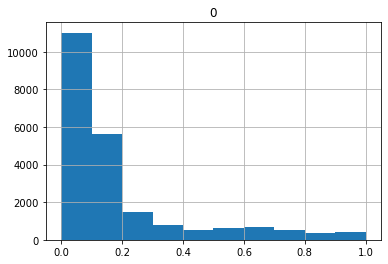

In [465]:
pd.DataFrame(model.predict(X_train)).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

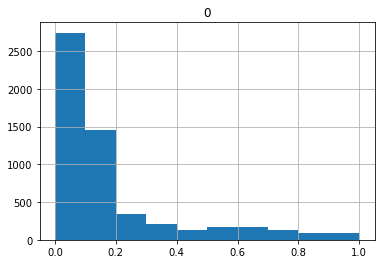

In [466]:
pd.DataFrame(model.predict(X_test)).hist()

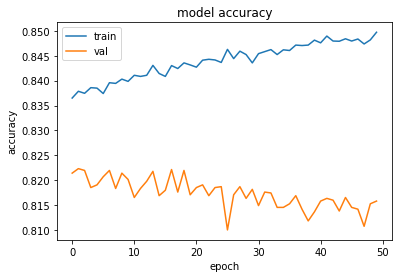

In [467]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

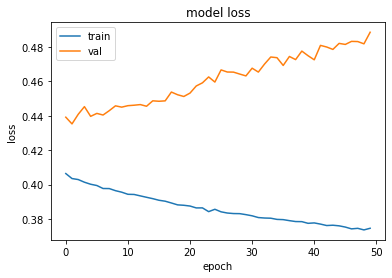

In [468]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

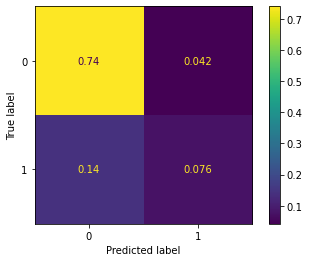

In [469]:
test_preds = model.predict(X_test).reshape(-1, 1)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_test, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

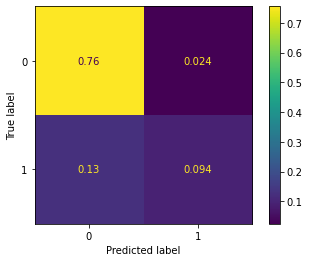

In [470]:
test_preds = model.predict(X_train).reshape(-1, 1)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_train, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

In [471]:
test_preds = model.predict(X_train).reshape(-1, 1)
test_preds = (test_preds>=0.5).astype(int)

r2 = metrics.r2_score(y_train, test_preds)
r2


0.12117539587530568

In [472]:
np.array(validation_metrics).mean(0)

array([0.44036216, 0.8218297 , 0.76733378])